[[  1.25946645 -21.27488348]
 [ -7.9576113   20.76869896]
 [ -6.99192297   9.95598641]
 ...
 [-10.8012837    6.96025223]
 [  4.87210009 -12.42395362]
 [  0.34438963  -6.36554919]]
[[ 0.          0.11062673  4.44191091 ... 10.63588133  2.52788111
   0.23646397]
 [ 0.          0.3759957   4.44625587 ...  2.38272456  1.37261165
   0.41232126]
 [ 0.          0.28343303  4.13127735 ...  4.37965006  1.61831177
   0.35098418]
 ...
 [ 0.          0.18721878  3.13311095 ...  4.56836045  1.53717901
   0.2872343 ]
 [ 0.          0.26261103  5.68352463 ...  9.39498371  2.487903
   0.33716958]
 [ 0.          0.24546778  4.96927985 ...  7.91962018  2.20433469
   0.32581632]]


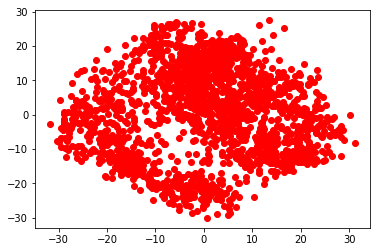

In [5]:
# 代码来自于机器学习实战
# 2个参数：一个参数是用于进行PCA操作的数据集，第二个参数是可选参数，即应用N个特征
# 首先计算并减去原始数据集的平均值，然后计算协方差矩阵及其特征值
# 然后利用argsort函数对特征值进行从小到大排序
# 根据特征值排序的逆序就可以得到最大的N个向量
# 这些向量将构成后面对数据进行转换的矩阵
# 该矩阵则利用N个特征将原始数据转换到新空间中
# 最后原始数据被重构后返回
# 同时，降维之后的数据集也被返回
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

def pca(dataMat,topNfeat=9999999):
    meanVals=np.mean(dataMat,axis=0)
    # 去除平均值，实现数据中心化
    meanRemoved=dataMat-meanVals 
    covMat=np.cov(meanRemoved,rowvar=0)
    # 计算矩阵的特征值个特征向量
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))
    eigValInd=np.argsort(eigVals)
    # 从大到小对N个值排序
    eigValInd=eigValInd[:-(topNfeat+1):-1]
    redEigVects=eigVects[:,eigValInd]
    # 将数据转换到新空间
    lowDDataMat=meanRemoved*redEigVects
    reconMat=(lowDDataMat*redEigVects.T)+meanVals
    return lowDDataMat,reconMat

dataMat = np.array([[1,2,3], [4,2,1], [3,2,1]])
X = load_digits().data[:, :]

lowDDataMat,reconMat = pca(X,topNfeat=2)
print(lowDDataMat)
print(reconMat)
plt.scatter(lowDDataMat[:,0].tolist(), lowDDataMat[:,1].tolist(),c = 'r',marker = 'o')